<a href="https://colab.research.google.com/github/Richmaninoff/Machine-learning-en-CCSS/blob/main/Propuesta_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Factores socioeconómicos que influyen en el acceso al sistema financiero en Perú con ENAHO

Existe una brecha empírica correspondiente a la mayor generación de evidencia sobre predictores de la inclusión financiera. Existe el potencial de encontrar nuevos factores. Se requiere una mayor representatividad de los resultados, datos que tengan alcance nacional y mínimamente representatividad a nivel regional.

Resulta oportuno explorar fuentes de datos más completas, como la ENAHO, que cuenta con un mayor volumen de observaciones y una variedad de potenciales regresores. Su edición anual más reciente, de 2023, incluye información detallada sobre el acceso a servicios financieros formales (como cuentas bancarias o tarjetas de débito y crédito) y el uso de medios de pago diversos, entre ellos tarjetas y banca por internet.


In [ ]:
import pandas as pd
import gdown #para archivos grandes de google drive

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate

In [ ]:
url = "https://drive.google.com/uc?id=108328YweXpvRAivTg5Jg-zP45Doz5IRA"
output = "Enaho01a-2023-500.csv"
gdown.download(url, output, quiet=False)

# Cargar el archivo CSV
import pandas as pd
df = pd.read_csv(output, encoding='latin-1')

Downloading...
From (original): https://drive.google.com/uc?id=108328YweXpvRAivTg5Jg-zP45Doz5IRA
From (redirected): https://drive.google.com/uc?id=108328YweXpvRAivTg5Jg-zP45Doz5IRA&confirm=t&uuid=eecc1f52-c341-410a-8499-6341446d330f
To: /content/Enaho01a-2023-500.csv
100%|██████████| 259M/259M [00:03<00:00, 67.7MB/s]
<ipython-input-4-c7cc1283b2ec>:7: DtypeWarning: Columns (218,223,228,231,234,235,236,241,246,251,256,261,266,271,276,281,286,291,296,301,306,311,316,321,326,331,338,341,344,347,350,353,356,359,363,365,367,369,371,373,375,377,379,381,385,386,387,388,389,393,485,486,487,488,935,936,937,938,939,940,941,942,943,944,1015,1018,1023) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output, encoding='latin-1')


In [ ]:
#df=pd.read_csv("https://drive.google.com/uc?export=download&id=108328YweXpvRAivTg5Jg-zP45Doz5IRA", encoding='latin-1' , sep=";")
#https://drive.google.com/file/d/108328YweXpvRAivTg5Jg-zP45Doz5IRA/view

In [ ]:
df

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,DOMINIO,ESTRATO,CODINFOR,...,I538E1,I5294B,I5404B,I541A,OCU500,OCUPINF,EMPLPSEC,FAC500A,NCONGLOME,SUB_CONGLOME
0,2023,1,5030,2,11,1,10201,7,4,1,...,,,,,1,2,,165.623856,6618,0
1,2023,1,5030,2,11,2,10201,7,4,2,...,,,,,1,2,,112.328087,6618,0
2,2023,1,5030,11,11,1,10201,7,4,1,...,,,,,1,1,1,96.035370,6618,0
3,2023,1,5030,11,11,2,10201,7,4,2,...,,,,,1,1,1,86.868881,6618,0
4,2023,1,5030,11,11,3,10201,7,4,3,...,,,,,1,1,1,185.492355,6618,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86649,2023,12,20670,67,11,2,10503,4,8,2,...,,,,,1,1,1,52.368996,7051,0
86650,2023,12,20670,68,11,1,10503,4,8,1,...,708,,,,1,1,1,94.397972,7051,0
86651,2023,12,20670,69,11,1,10503,4,8,1,...,,,,,1,1,1,54.246708,7051,0
86652,2023,12,20670,69,11,2,10503,4,8,2,...,,,,,1,1,1,69.487373,7051,0


In [ ]:
df.replace({' ': np.nan, '': np.nan}, inplace=True)

<ipython-input-7-2a09de2bfd54>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({' ': np.nan, '': np.nan}, inplace=True)


In [ ]:
#https://drive.google.com/file/d/1Aa0qZ4RHlXs6Syg3fM1tq_B7UBuUndwG/view?usp=sharing
url1 = "https://drive.google.com/uc?id=1Aa0qZ4RHlXs6Syg3fM1tq_B7UBuUndwG"
output1 = "Sumaria-2023.csv"
gdown.download(url1, output1, quiet=False)

# Cargar el archivo CSV
#import pandas as pd
df_sumaria = pd.read_csv(output1, encoding='latin-1')

Downloading...
From: https://drive.google.com/uc?id=1Aa0qZ4RHlXs6Syg3fM1tq_B7UBuUndwG
To: /content/Sumaria-2023.csv
100%|██████████| 23.9M/23.9M [00:01<00:00, 20.0MB/s]


In [ ]:
DF_junto= pd.merge(left =df,
         right=df_sumaria,
         left_on=["CONGLOME","VIVIENDA","HOGAR"],
         right_on=["CONGLOME","VIVIENDA","HOGAR"],
         how="inner")
DF_junto

,AÑO_x,MES_x,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO_x,DOMINIO_x,ESTRATO_x,CODINFOR,...,LD,ESTRSOCIAL,LINPE,LINEA,POBREZA,LINEAV,POBREZAV,FACTOR07,NCONGLOME_y,SUB_CONGLOME_y
0,2023,1,5030,2,11,1,10201,7,4,1,...,0.809237,4,244.489227,401.320129,3,680.967834,4,118.374542,6618,0
1,2023,1,5030,2,11,2,10201,7,4,2,...,0.809237,4,244.489227,401.320129,3,680.967834,4,118.374542,6618,0
2,2023,1,5030,11,11,1,10201,7,4,1,...,0.809237,4,244.489227,401.320129,3,702.599609,4,118.374542,6618,0
3,2023,1,5030,11,11,2,10201,7,4,2,...,0.809237,4,244.489227,401.320129,3,702.599609,4,118.374542,6618,0
4,2023,1,5030,11,11,3,10201,7,4,3,...,0.809237,4,244.489227,401.320129,3,702.599609,4,118.374542,6618,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86649,2023,12,20670,67,11,2,10503,4,8,2,...,0.750040,6,217.144974,322.850830,3,641.257874,3,65.991585,7051,0
86650,2023,12,20670,68,11,1,10503,4,8,1,...,0.750040,6,217.144974,322.850830,3,631.630432,4,65.991585,7051,0
86651,2023,12,20670,69,11,1,10503,4,8,1,...,0.750040,6,217.144974,322.850830,3,689.190186,3,65.991585,7051,0
86652,2023,12,20670,69,11,2,10503,4,8,2,...,0.750040,6,217.144974,322.850830,3,689.190186,3,65.991585,7051,0


## OPERACIONALIZACIÓN VD:INCLUSIÓN FINANCIERA

### DIMENSIÓN 1 (POSEE CUENTA EN BANCO)
P558E1_1: tiene usted el algún banco ...¿Cuenta de ahorro o cuenta sueldo?
0. Pase
1. Cuenta de ahorro o cuenta sueldo

P558E1_2: Actualmente, tiene usted el algún banco, ...¿Cuenta a plazo fijo?
0. Pase
2. Cuenta a plazo fijo

P558E1_3: Actualmente, tiene usted el algún banco ...¿Cuenta corriente?
0. Pase
3. Cuenta corriente

P558E1_6: Actualmente, tiene usted el algún banco ...No tiene
0. Pase
6. No tiene

P558E1_7: Actualmente, tiene usted el algún banco ...¿Cuenta compensación por tiempo de
servicio CTS
0. Pase
7. Cuenta compensación por tiempo de servicio CTS

### DIMENSIÓN 2 (USO banca por internet, tarjeta débito, tarjeta crédito)


P558H1_4 En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Alimentos de pan llevar (Leche, papa, arroz azúcar , etc), es: Banca por Internet?
0. Pase
4. Banca por Internet

P558H2_4 En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Alimentos preparados para consumir dentro o fuera del hogar, es: Banca por Internet?
0. Pase
4. Banca por Internet


P558H3_4 En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Productos de lavandería, artículos de aseo del hogar, es: Banca por Internet?
0. Pase
4. Banca por Internet
P558H4_4 En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Servicios de la vivienda: Luz, agua, teléfono, Internet, celular, entre otros es: Banca por Internet?
0. Pase
4. Banca por Interne



P558H5_4 En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Combustible para cocinar (gas, electricidad, etc.) es: Banca por Internet?
0. Pase
4. Banca por Internet




P558H6_4 1 0 N
En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Productos de aseo personal es: Banca por Internet?
0. Pase
4. Banca por Internet

P558H7_4 En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Prendas de vestir, calzado, etc., es: Banca por Internet?
0. Pase
4. Banca por Internet

P558H8_4 En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para ¿Muebles y enseres es: Banca por Internet?
0. Pase
4. Banca por Internet



P558H9_4 1 0 N
En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Artefactos electrodomésticos, es: Banca por Internet?
0. Pase
4. Banca por Internet



P558H10_4 En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Otro (especifique) es : Banca por Internet?
0. Pase
4. Banca por Internet


P558H11_4 En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Otro (especifique) es : Banca por Internet?
0. Pase
4. Banca por Internet


P558H12_4 En los últimos 12 meses, de ... a ..., Los medios de pago que Ud. generalmente utiliza para realizar sus compras de: ¿Otro (especifique) es : Banca por Internet?
0. Pase
4. Banca por Internet


### falta añadir
tarjeta de débito: P558H1_2 hasta P558H12_2

tarjeta de crétido: P558H1_3 hasta P558H12_3



In [ ]:
DF_junto["P558E1_7"].unique() # P558E1_6 Actualmente, tiene usted el algún banco ...No tiene

array(['0', nan, '7'], dtype=object)

In [ ]:
# Eliminar filas donde P558E1_6 sea nulo
df1 = DF_junto.dropna(subset=['P558E1_6'])

# Crear la variable Tiene_Cuenta sin eliminar los 0s
df1['Tiene_Cuenta'] = df1[['P558E1_1', 'P558E1_2', 'P558E1_3', 'P558E1_7']].apply(
    lambda row: 1 if any(x not in ['0', np.nan] for x in row) else 0, axis=1
)

<ipython-input-21-0f94abaa107c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tiene_Cuenta'] = df1[['P558E1_1', 'P558E1_2', 'P558E1_3', 'P558E1_7']].apply(


In [ ]:
df1

,AÑO_x,MES_x,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO_x,DOMINIO_x,ESTRATO_x,CODINFOR,...,ESTRSOCIAL,LINPE,LINEA,POBREZA,LINEAV,POBREZAV,FACTOR07,NCONGLOME_y,SUB_CONGLOME_y,Tiene_Cuenta
0,2023,1,5030,2,11,1,10201,7,4,1,...,4,244.489227,401.320129,3,680.967834,4,118.374542,6618,0,1
1,2023,1,5030,2,11,2,10201,7,4,2,...,4,244.489227,401.320129,3,680.967834,4,118.374542,6618,0,1
2,2023,1,5030,11,11,1,10201,7,4,1,...,4,244.489227,401.320129,3,702.599609,4,118.374542,6618,0,0
3,2023,1,5030,11,11,2,10201,7,4,2,...,4,244.489227,401.320129,3,702.599609,4,118.374542,6618,0,0
4,2023,1,5030,11,11,3,10201,7,4,3,...,4,244.489227,401.320129,3,702.599609,4,118.374542,6618,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86649,2023,12,20670,67,11,2,10503,4,8,2,...,6,217.144974,322.850830,3,641.257874,3,65.991585,7051,0,0
86650,2023,12,20670,68,11,1,10503,4,8,1,...,6,217.144974,322.850830,3,631.630432,4,65.991585,7051,0,0
86651,2023,12,20670,69,11,1,10503,4,8,1,...,6,217.144974,322.850830,3,689.190186,3,65.991585,7051,0,0
86652,2023,12,20670,69,11,2,10503,4,8,2,...,6,217.144974,322.850830,3,689.190186,3,65.991585,7051,0,0


In [ ]:
from tabulate import tabulate

descripcion = df1['Tiene_Cuenta'].describe().round(3).rename(index={
    'count': 'Cantidad de datos',
    'mean': 'Media',
    'std': 'Desviación estándar',
    'min': 'Valor mínimo',
    '25%': 'Percentil 25',
    '50%': 'Mediana (Percentil 50)',
    '75%': 'Percentil 75',
    'max': 'Valor máximo'
})

tabla = tabulate(descripcion.to_frame(), headers=['Estadístico', 'Valor'], tablefmt='grid')
print(tabla)


+------------------------+-----------+
| Estadístico            |     Valor |
+========================+===========+
| Cantidad de datos      | 77685     |
+------------------------+-----------+
| Media                  |     0.522 |
+------------------------+-----------+
| Desviación estándar    |     0.5   |
+------------------------+-----------+
| Valor mínimo           |     0     |
+------------------------+-----------+
| Percentil 25           |     0     |
+------------------------+-----------+
| Mediana (Percentil 50) |     1     |
+------------------------+-----------+
| Percentil 75           |     1     |
+------------------------+-----------+
| Valor máximo           |     1     |
+------------------------+-----------+


In [ ]:
df1['Tiene_Cuenta'].value_counts()

,count
Tiene_Cuenta,
1,40577
0,37108


In [ ]:
df1.groupby(["Tiene_Cuenta"])["ESTRSOCIAL"].value_counts().unstack(fill_value=0)

ESTRSOCIAL,1,2,3,4,5,6
Tiene_Cuenta,,,,,,
0,334,1041,3018,6847,10684,15184
1,1563,2957,5710,9856,10838,9653


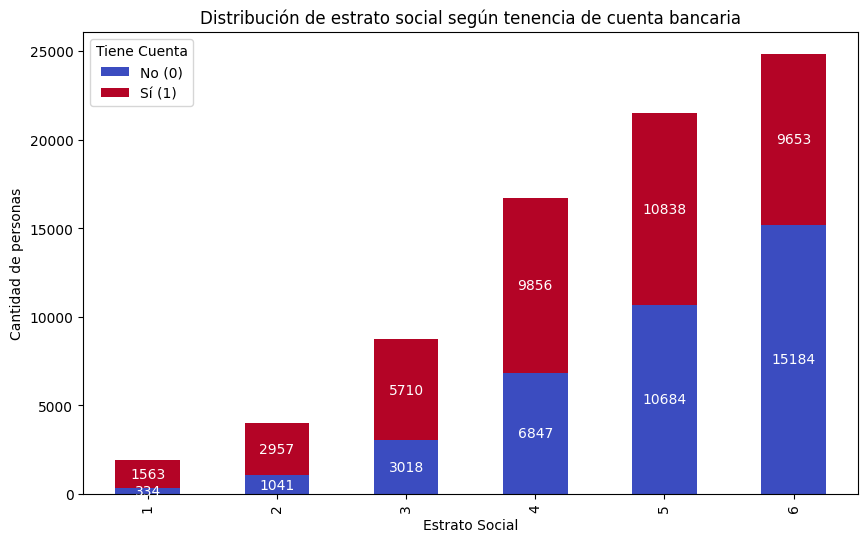

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df1.groupby(["Tiene_Cuenta"])["ESTRSOCIAL"].value_counts().unstack(fill_value=0)
ax = df_plot.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.xlabel("Estrato Social")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de estrato social según tenencia de cuenta bancaria")
plt.legend(title="Tiene Cuenta", labels=["No (0)", "Sí (1)"])

# Agregar los valores en las barras
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='center', fontsize=10, color='white')

plt.show()

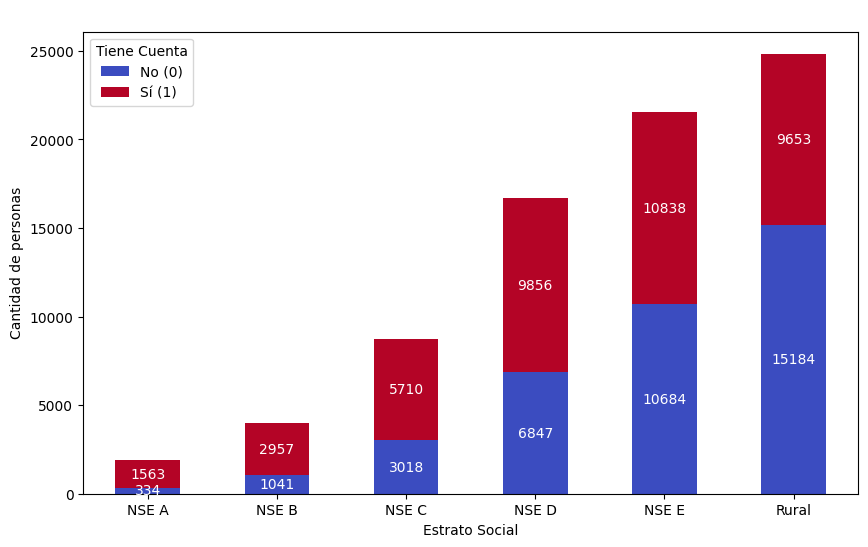

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar y transformar los datos
df_plot = df1.groupby(["Tiene_Cuenta"])["ESTRSOCIAL"].value_counts().unstack(fill_value=0)

# Definir etiquetas personalizadas para los estratos
estrato_labels = ["NSE A", "NSE B", "NSE C", "NSE D", "NSE E", "Rural"]

# Crear el gráfico de barras apiladas
ax = df_plot.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

# Reemplazar los números en el eje X con los nombres de los estratos
ax.set_xticks(range(len(estrato_labels)))
ax.set_xticklabels(estrato_labels, rotation=0)

# Etiquetas y título
plt.xlabel("Estrato Social")
plt.ylabel("Cantidad de personas")
plt.title(" ")
plt.legend(title="Tiene Cuenta", labels=["No (0)", "Sí (1)"])

# Agregar los valores en las barras
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='center', fontsize=10, color='white')

plt.show()


¿Qué factores socioeconómicos predicen la inclusión financiera en el Perú en 2023?

### INDICADORES RESUMEN

- posee cuenta (si/no)
- usa banca POR INTERNET (si/no)
- usa tarjeta de crédtito (si/no)
- usa tarjeta de débito (si/no)

VALORES: 1/0

### METODOLOGÍA

justificar meot

prueba de correlación entre X, para descartar variables

validación cruzada con enfoque: conjunto de validación

Regresión de LASSO vs RF (justificar)

testeo con error medio de predicción de prueba ( test MSE), Prueba F-1 y Receiver Operating Curve (ROC)


In [ ]:
import pandas as pd
output = "BD_Encuesta_Capacidades_Financieras_2022.dta"
SBS = pd.read_stata(output) #, encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: 'BD_Encuesta_Capacidades_Financieras_2022.dta'

In [ ]:
SBS